In [45]:
import torch  
import sys 
print(torch.__version__)
print("当前使用的cuda版本：", torch.version.cuda)
print(torch.cuda.is_available())
print("Python Version:", sys.version) 

sys.path.append("../../argoverse-api/") 

import argoverse

1.13.1+cu117
当前使用的cuda版本： 11.7
True
Python Version: 3.7.16 (default, Jan 17 2023, 22:20:44) 
[GCC 11.2.0]


In [22]:
!pwd  
import os 
wkspace = "../../TNT-Trajectory-Prediction/" 
val_pth = wkspace + "val"
train_pth = wkspace + "train"
print(val_pth) 

# 检查train_pth是否存在
print(os.path.exists(val_pth))

import pandas as pd 
# 遍历val_path下所有文件
# for file in os.listdir(val_pth+"/val/data/"):
    # print(file) 
    
data = pd.read_csv(val_pth + "/val/data/1.csv")
print(data.head())


/media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps
../../TNT-Trajectory-Prediction/val
True
      TIMESTAMP                              TRACK_ID OBJECT_TYPE  \
0  3.159906e+08  00000000-0000-0000-0000-000000000000          AV   
1  3.159906e+08  00000000-0000-0000-0000-000000189649      OTHERS   
2  3.159906e+08  00000000-0000-0000-0000-000000189670      OTHERS   
3  3.159906e+08  00000000-0000-0000-0000-000000189674      OTHERS   
4  3.159906e+08  00000000-0000-0000-0000-000000189661       AGENT   

             X           Y CITY_NAME  
0  1789.089512  410.543838       PIT  
1  1801.788431  413.601881       PIT  
2  1770.344981  410.407163       PIT  
3  1775.371246  422.285637       PIT  
4  1766.147689  383.719366       PIT  


#### 符号说明 

- TIMESTAMP 时间戳 
  - 采样频率 10Hz，tp0.1s，5s轨迹50个点  
  - AV 自车 50点轨迹
  - AGENT 感兴趣车辆 50点轨迹
  - OTHER 最多50（可能消失/出现）
- TRACK_ID 跟踪id
  - 用于识别&匹配 
- OBJECT_TYPE
  - AV、AGENT、OTHER 
- x,y 坐标
- CITY_NAME 
  - Map名 
  
Argoverse数据集在轨迹预测上**未给出具体类别标签**（三轮车、小车、货车），限制了预测模型性能，不同类别智能体对其他智能体的交互影响显式不同

### HDMap API 


In [23]:
import argoverse  

# Create Argoverse Loader 
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader  

root_dir = val_pth + "/val/data/"  
train_dir = train_pth + "/train/data"
print(train_dir) 
print(os.path.exists(train_dir))  

# --------------------------------- 
af1 = ArgoverseForecastingLoader(train_dir)       
print('Sequence_len', len(af1)) # 39472个数据


../../TNT-Trajectory-Prediction/train/train/data
True
Sequence_len 205942


In [24]:
print(af1[4])
print(af1[4].track_id_list)
# print(af1[4].pos)

Seq : /media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/train/data/10000.csv
        ----------------------
        || City: MIA
        || # Tracks: 37
        ----------------------
['00000000-0000-0000-0000-000000000000', '00000000-0000-0000-0000-000000089157', '00000000-0000-0000-0000-000000089172', '00000000-0000-0000-0000-000000089204', '00000000-0000-0000-0000-000000089218', '00000000-0000-0000-0000-000000089226', '00000000-0000-0000-0000-000000089231', '00000000-0000-0000-0000-000000089241', '00000000-0000-0000-0000-000000089242', '00000000-0000-0000-0000-000000089253', '00000000-0000-0000-0000-000000089258', '00000000-0000-0000-0000-000000089260', '00000000-0000-0000-0000-000000089264', '00000000-0000-0000-0000-000000089271', '00000000-0000-0000-0000-000000089272', '00000000-0000-0000-0000-000000089273', '00000000-0000-0000-0000-000000089277', '00000000-0000-0000-0000-000000089279', '00000000-0000-0000-0000-000000089280', '00000000-000

In [25]:
import random  

# 随机生成10个索引 
def random_index(num):
    return [random.randint(0, num - 1) for _ in range(10)] 

random_idx = random_index(20) 

for i in random_idx:
    print(af1[i])
    print()

Seq : /media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/train/data/100.csv
        ----------------------
        || City: MIA
        || # Tracks: 23
        ----------------------

Seq : /media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/train/data/100.csv
        ----------------------
        || City: MIA
        || # Tracks: 23
        ----------------------

Seq : /media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/train/data/100001.csv
        ----------------------
        || City: PIT
        || # Tracks: 28
        ----------------------

Seq : /media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/train/data/1.csv
        ----------------------
        || City: PIT
        || # Tracks: 12
        ----------------------

Seq : /media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/t

../../TNT-Trajectory-Prediction/train
         TIMESTAMP                              TRACK_ID OBJECT_TYPE  \
0     3.159689e+08  00000000-0000-0000-0000-000000000000          AV   
1     3.159689e+08  00000000-0000-0000-0000-000000041500      OTHERS   
2     3.159689e+08  00000000-0000-0000-0000-000000041656      OTHERS   
3     3.159689e+08  00000000-0000-0000-0000-000000041782      OTHERS   
4     3.159689e+08  00000000-0000-0000-0000-000000041819      OTHERS   
...            ...                                   ...         ...   
1053  3.159689e+08  00000000-0000-0000-0000-000000041961      OTHERS   
1054  3.159689e+08  00000000-0000-0000-0000-000000041982      OTHERS   
1055  3.159689e+08  00000000-0000-0000-0000-000000041975      OTHERS   
1056  3.159689e+08  00000000-0000-0000-0000-000000041947      OTHERS   
1057  3.159689e+08  00000000-0000-0000-0000-000000041880      OTHERS   

               X            Y CITY_NAME  
0     737.503800  1803.488354       MIA  
1     722.870

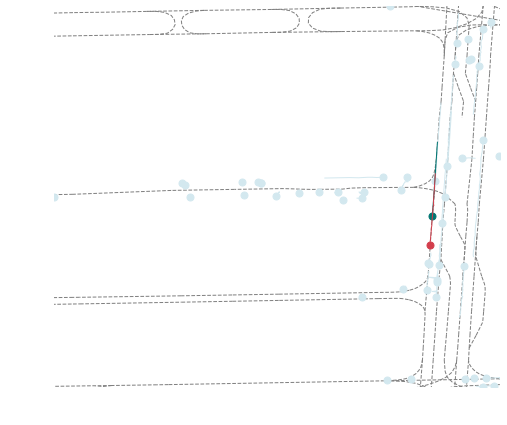

In [53]:
from argoverse.visualization.visualize_sequences import viz_sequence  
print(train_pth)
seq_path = f"{train_pth}/train/data/2655.csv" 

data = af1.get(seq_path) 
print(data.seq_df) # 1027 * 6的pandas dataframe

viz_sequence(af1.get(seq_path).seq_df, show=True) 

# green --- 自车 
# red --- AGENT 
# 浅蓝色 --- OTHERS  

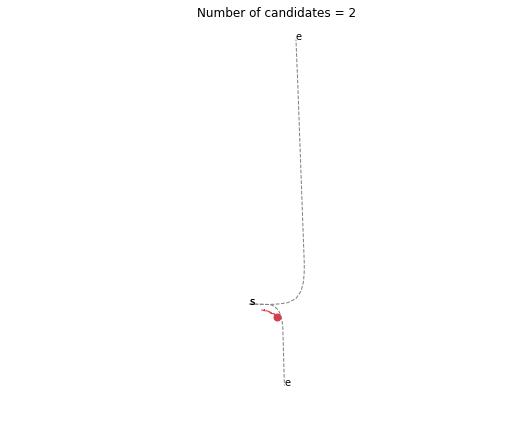

/media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/train/data/117116.csv
Seq : /media/irvinghe/CodingSpace/ArgDataset/VectorZoo/Exps/../../TNT-Trajectory-Prediction/train/train/data/117116.csv
        ----------------------
        || City: MIA
        || # Tracks: 9
        ----------------------
205942


In [67]:
# 地图信息 
# Agent轨迹的得到候选中心线 
# 用前2s轨迹计算候选中心线后3s 
from argoverse.map_representation.map_api import ArgoverseMap 
avm = ArgoverseMap() 

obs_len = 20 # 
index = 255 
seq_path = af1.seq_list[index]  
agent_obs_traj = af1.get(seq_path).agent_traj[:obs_len]  # 前2s轨迹 20个点 频率10Hz  
# av_obs_traj = af1.get(seq_path).av_obs_traj[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, af1[index].city, viz=True) 

# print(agent_obs_traj) 
print(seq_path)
print(af1[index]) 
print(len(af1.seq_list)) # 205942
# s--start 
# e--end
# 点 表示现在pos


### Map可视化

In [76]:
# create new map api 
import os 
from argoverse.map_representation.map_api import ArgoverseMap 

Map = ArgoverseMap()  

tracking_pth = "../../TNT-Trajectory-Prediction/tracking/argoverse-tracking/data/" 
print(os.path.exists(tracking_pth))


False


#### 1. Lane Polygon 车道几何 

`Argoverse.find_local_lane_polygons` 找到特定区域的车道几何  

In [75]:
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader 

log_index = 0 
frame_index = 100 
idx = 100 

argoverse_loader = ArgoverseTrackingLoader(tracking_pth) 
log_id = argoverse_loader.log_lists[log_index] 
argoverse_data = argoverse_loader[log_index]  
city_name = argoverse_data.city_name 

lidar_pts = argoverse_data.get_lidar(idx)


IndexError: list index out of range